In [3]:
import sys
from vispy import color
from vispy import scene
from vispy import app, plot
import pylab
import recviewer
from astropy.io import fits
from astropy.utils.data import download_file
import numpy as np

In [4]:
def waterfall(signal, sample_rate=None, bins = 4096 ):
    waterfall = recviewer.waterfallize(signal, bins)
    waterfall[np.isneginf(waterfall)] = np.nan
    wmin, wmax = np.nanmin(waterfall), np.nanmax(waterfall)
#    waterfall = ((waterfall - wmin) / (wmax - wmin)) * 5.5 - 4.5
#    waterfall = cm.map(waterfall)
    return waterfall

In [ ]:
import dateutil.parser
from matplotlib import dates
import datetime

raw_files = []
raw_files.append([download_file('http://space.astro.cz/bolidozor/ZEBRAK/ZEBRAK-R2/meteors/2015/03/15/19/20150315194427928_ZEBRAK-R2_raws.fits', cache=True ),
                  {'latitude':49.8736, 'longitude':13.8986, 'Tstamp': 26.1, 'Tpca': 25.15, 'Dslope': 1/800.0, 'Cfreq': 10600, 'SampleFreq': 96000.0}])
raw_files.append([download_file('http://space.astro.cz/bolidozor/uFlu/uFlu-R1/meteors/2015/03/15/19/20150315194418800_uFlu-R1_raws.fits', cache=True ),
                  {'latitude':50.0795, 'longitude':14.4891, 'Tstamp': 22.4, 'Tpca': 21.62, 'Dslope': 1/800.0, 'Cfreq': 10600, 'SampleFreq': 96000.0}])
raw_files.append([download_file('http://space.astro.cz/bolidozor/OBSUPICE/OBSUPICE-R3/meteors/2015/03/15/19/20150315194404200_OBSUPICE-R3_raws.fits', cache=True ),
                  {'latitude':50.5067,'longitude':16.0115, 'Tstamp': 26.48, 'Tpca': 25.84, 'Dslope': 1/700.0, 'Cfreq': 10600, 'SampleFreq': 48000.0}])
raw_files.append([download_file('http://space.astro.cz/bolidozor/svakov/SVAKOV-R6/meteors/2015/03/15/19/20150315194355315_SVAKOV-R6_raws.fits', cache=True ),
                  {'latitude':49.2607,'longitude':14.6917, 'Tstamp': 23.06, 'Tpca': 20.23, 'Dslope': 1/850.0, 'Cfreq': 10600, 'SampleFreq': 96000.0}])
raw_files.append([download_file('http://space.astro.cz/bolidozor/ZVPP/ZVPP-R2/meteors/2015/03/15/19/20150315194408977_ZVPP-R2_raws.fits', cache=True ),
                  {'latitude':48.9869,'longitude':14.4675, 'Tstamp': 5.1, 'Tpca': 1.24, 'Dslope': 1/1000.0, 'Cfreq': 11548, 'SampleFreq': 96000.0}])


In [101]:
import dateutil.parser
from matplotlib import dates
import datetime

#Bolidozor event: http://meteor1.astrozor.cz:5252/multibolid/event/55793083/

raw_files = []
raw_files.append([download_file('http://space.astro.cz/bolidozor/ZEBRAK/ZEBRAK-R3/meteors/2016/05/20/01/20160520011808489_ZEBRAK-R3_raws.fits', cache=True ),
                  {'latitude':49.8736, 'longitude':13.8986, 'Tstamp': 4.71, 'Tpca': 11.61, 'Dslope': (11.88 - 11.61)/(28305-26500), 'Cfreq': 26500, 'SampleFreq': 96000.0}])
raw_files.append([download_file('http://space.astro.cz/bolidozor/nachodsko/NACHODSKO-R3/meteors/2016/05/20/01/20160520011752889_NACHODSKO-R3_raws.fits', cache=True ),
                  {'latitude':50.409407, 'longitude':15.414812, 'Tstamp': 8.08, 'Tpca': 15, 'Dslope': (15.208 - 15.0)/(27858-26500), 'Cfreq': 26500, 'SampleFreq': 96000.0}])
raw_files.append([download_file('http://space.astro.cz/bolidozor/ZVOLENEVES/ZVOLENEVES-R1/meteors/2016/05/20/01/20160520011818945_ZVOLENEVES-R1_raws.fits', cache=True ),
                  {'latitude':50.229984, 'longitude':14.177880, 'Tstamp': 5.38, 'Tpca': 12.25, 'Dslope': (12.333 - 12.25)/(27113-26500), 'Cfreq': 26500, 'SampleFreq': 96000.0}])
raw_files.append([download_file('http://space.astro.cz/bolidozor/OBSUPICE/OBSUPICE-R4/meteors/2016/05/20/01/20160520011813222_OBSUPICE-R3_raws.fits', cache=True ),
                  {'latitude':50.5067,'longitude':16.0115, 'Tstamp': 3.83, 'Tpca': 10.8, 'Dslope': (11.004 - 10.8)/(11904-10600), 'Cfreq': 10600, 'SampleFreq': 48000.0}])
raw_files.append([download_file('http://space.astro.cz/bolidozor/ddmtrebic/DDMTREBIC-TEST-R1/meteors/2016/05/20/01/20160520011827086_DDMTREBIC-TEST-R1_raws.fits', cache=True ),
                  {'latitude':49.207180,'longitude':15.876004, 'Tstamp': 13.74, 'Tpca': 20.717, 'Dslope': (20.966 - 20.717)/(27914-26500), 'Cfreq': 26500, 'SampleFreq': 96000.0}])
#raw_files.append([download_file('http://space.astro.cz/bolidozor/ZVPP/ZVPP-R4/meteors/2016/05/20/01/20160520011813210_ZVPP-R4_raws.fits', cache=True ),
#                  {'latitude':48.9869,'longitude':14.4675, 'Tstamp': 5.1, 'Tpca': 1.24, 'Dslope': 1/1000.0, 'Cfreq': 11548}])


In [103]:
%pylab qt
matplotlib.rcParams.update({'font.size': 16})   # font size settings.


f = pylab.figure()
#plt.title('Bolidozor event 55793083 at 2016-05-20 01:18:13 UTC', loc= 'top')

for n, fname in enumerate(raw_files):    
    hdu_list = fits.open(fname[0])
    image_data = hdu_list[0].data
    flat_data = np.ravel(image_data)
    hdu = hdu_list[0]
    d1 = dateutil.parser.parse(hdu.header['DATE'])
    fds1 = dates.date2num(d1) # converted
    d2 = d1 + datetime.timedelta(seconds=hdu.header['NAXIS2']/fname[1]['SampleFreq'])
    fds2 = dates.date2num(d2) # converted
    arr = waterfall(flat_data[0::2] + 1j * flat_data[1::2], fname[1]['SampleFreq'], bins = 2048)
#    f.add_subplot(2, 1, n)  # this line outputs images on top of each other
    f.add_subplot(1, len(raw_files), n +1)  # this line outputs images side-by-side
    pylab.xlabel('Frequency [Hz]')
    pylab.ylabel('Time [s]')
    pylab.imshow(arr,  interpolation='nearest', aspect='auto',  extent=[-fname[1]['SampleFreq']/2, fname[1]['SampleFreq']/2, 0, hdu.header['NAXIS2']/fname[1]['SampleFreq']])
    pylab.xlim(fname[1]['Cfreq'] - 300,fname[1]['Cfreq'] + 2000)
    pylab.ylim(fname[1]['Tstamp']+7.5, fname[1]['Tstamp']+6.5)
    pylab.plot([fname[1]['Cfreq'], fname[1]['Cfreq']], [fname[1]['Tstamp'],fname[1]['Tpca']], 'g-', label='line 1', linewidth=4)
    x1 = -300
    x2 = +2000
    y1 = fname[1]['Dslope']*x1 + fname[1]['Tpca']
    y2 = fname[1]['Dslope']*x2 + fname[1]['Tpca']
    pylab.plot([fname[1]['Cfreq'] + x1,fname[1]['Cfreq'] + x2], [y1,y2], 'bo:', label='line 1', linewidth=4)
#    pylab.set_cmap('gist_ncar')
    pylab.set_cmap('hot')
    pylab.title(hdu.header['ORIGIN'])

pylab.show()


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [124]:
for n, fname in enumerate(raw_files):
    for t in range(-400,400,20):
        print n+1, fname[1]['Tpca'] - fname[1]['Tstamp'] + (t/1000.0), (t/1000.0)/fname[1]['Dslope']


1 6.5 -2674.07407407
1 6.52 -2540.37037037
1 6.54 -2406.66666667
1 6.56 -2272.96296296
1 6.58 -2139.25925926
1 6.6 -2005.55555556
1 6.62 -1871.85185185
1 6.64 -1738.14814815
1 6.66 -1604.44444444
1 6.68 -1470.74074074
1 6.7 -1337.03703704
1 6.72 -1203.33333333
1 6.74 -1069.62962963
1 6.76 -935.925925926
1 6.78 -802.222222222
1 6.8 -668.518518519
1 6.82 -534.814814815
1 6.84 -401.111111111
1 6.86 -267.407407407
1 6.88 -133.703703704
1 6.9 0.0
1 6.92 133.703703704
1 6.94 267.407407407
1 6.96 401.111111111
1 6.98 534.814814815
1 7.0 668.518518519
1 7.02 802.222222222
1 7.04 935.925925926
1 7.06 1069.62962963
1 7.08 1203.33333333
1 7.1 1337.03703704
1 7.12 1470.74074074
1 7.14 1604.44444444
1 7.16 1738.14814815
1 7.18 1871.85185185
1 7.2 2005.55555556
1 7.22 2139.25925926
1 7.24 2272.96296296
1 7.26 2406.66666667
1 7.28 2540.37037037
2 6.52 -2611.53846154
2 6.54 -2480.96153846
2 6.56 -2350.38461538
2 6.58 -2219.80769231
2 6.6 -2089.23076923
2 6.62 -1958.65384615
2 6.64 -1828.07692308
2 6.6

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


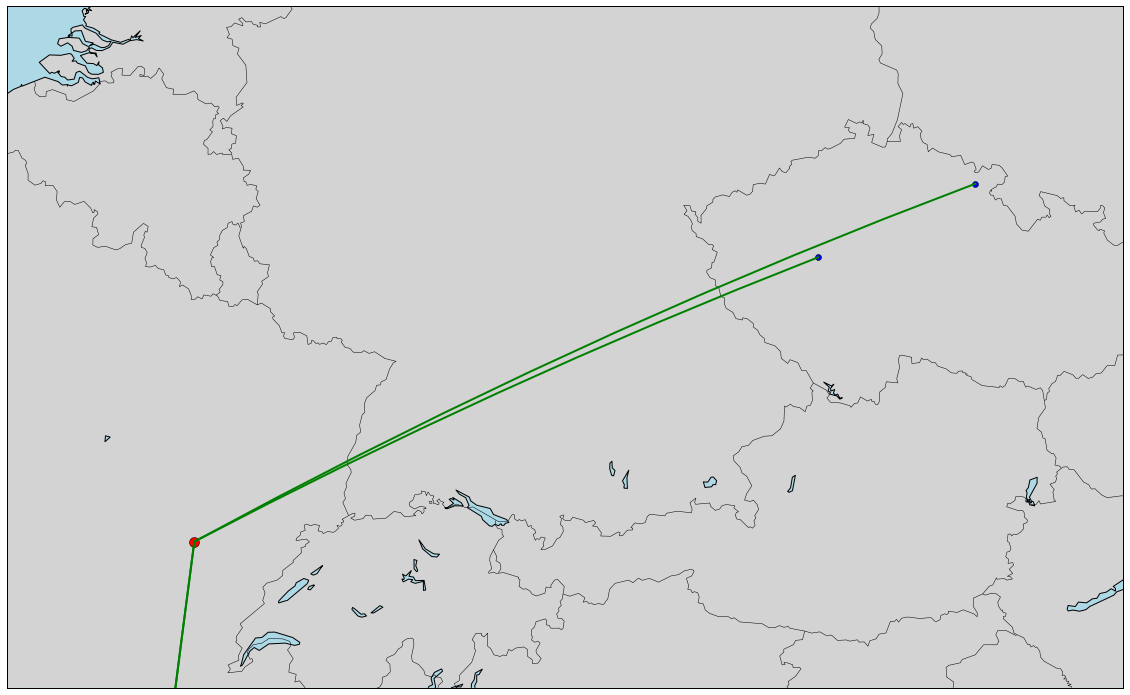

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%pylab inline

land_color = 'lightgray'
water_color = 'lightblue'

fig, ax = subplots(figsize=(20,20))
#fig = pylab.figure(figsize=(20,20))
map = Basemap(projection='merc', llcrnrlat=46, urcrnrlat=52,
            llcrnrlon=3, urcrnrlon=18, resolution='i',area_thresh = 20)

land_color = 'lightgray'
water_color = 'lightblue'

map.fillcontinents(color=land_color, lake_color=water_color)
map.drawcoastlines()
map.drawcountries()
#map.drawparallels(np.arange(-90.,120.,30.))
#map.drawmeridians(np.arange(0.,420.,60.))
map.drawmapboundary(fill_color=water_color)
#ax.set_title('Bistatic network')

#x, y = map(np.array(near_transmitters.longitude_deg), np.array(near_transmitters.latitude_deg))
#map.plot(x, y, marker='o', markersize=6, markerfacecolor='red', linewidth=0)

x, y = map(np.array(5.5151), np.array(47.348))
map.plot(x, y, marker='o', markersize=10, markerfacecolor='red', linewidth=0)


for path in enumerate(raw_files):
    station_latitude = path[1][1]['latitude']
    station_longitude = path[1][1]['longitude']
    x, y = map(station_longitude, station_latitude)
    map.plot(x, y, marker='o', markersize=6, markerfacecolor='blue', linewidth=0)

for path in enumerate(raw_files):
    station_latitude = path[1][1]['latitude']
    station_longitude = path[1][1]['longitude']
    map.drawgreatcircle(5.5151, 47.348, station_longitude, station_latitude,linewidth=2,color='green')

map.ax = ax
#fig.show()
#%pylab qt

In [109]:
for i in range(0, -1000, -10):
    print(i/1000.0)

0.0
-0.01
-0.02
-0.03
-0.04
-0.05
-0.06
-0.07
-0.08
-0.09
-0.1
-0.11
-0.12
-0.13
-0.14
-0.15
-0.16
-0.17
-0.18
-0.19
-0.2
-0.21
-0.22
-0.23
-0.24
-0.25
-0.26
-0.27
-0.28
-0.29
-0.3
-0.31
-0.32
-0.33
-0.34
-0.35
-0.36
-0.37
-0.38
-0.39
-0.4
-0.41
-0.42
-0.43
-0.44
-0.45
-0.46
-0.47
-0.48
-0.49
-0.5
-0.51
-0.52
-0.53
-0.54
-0.55
-0.56
-0.57
-0.58
-0.59
-0.6
-0.61
-0.62
-0.63
-0.64
-0.65
-0.66
-0.67
-0.68
-0.69
-0.7
-0.71
-0.72
-0.73
-0.74
-0.75
-0.76
-0.77
-0.78
-0.79
-0.8
-0.81
-0.82
-0.83
-0.84
-0.85
-0.86
-0.87
-0.88
-0.89
-0.9
-0.91
-0.92
-0.93
-0.94
-0.95
-0.96
-0.97
-0.98
-0.99


společné záznamy se sítí EDMOND.

In [ ]:
http://meteor1.astrozor.cz:5252/multibolid/event/950404/
http://meteor1.astrozor.cz:5252/multibolid/event/1651523/
http://meteor1.astrozor.cz:5252/multibolid/event/1650562/
http://meteor1.astrozor.cz:5252/multibolid/event/1740199/